In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

Reading FA Cup teams merged with league table information for all non-league teams (1952+) then concatenating

In [3]:
nl_1952 = pd.read_csv(r'C:\Dropbox\Python\scrapy\facup\02_merge\fa_nl_merge_1952-89_v1.csv')
nl_1990 = pd.read_csv(r'C:\Dropbox\Python\scrapy\facup\02_merge\fa_nl_merge_1990-11_v1.csv')
nl_2012 = pd.read_csv(r'C:\Dropbox\Python\scrapy\facup\02_merge\fa_nl_merge_2012-15_v1.csv')

In [4]:
nl_all = pd.concat([nl_1952, nl_1990, nl_2012], ignore_index=True)

In [5]:
nl_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047 entries, 0 to 2046
Data columns (total 7 columns):
league    2046 non-null object
pos       2046 non-null float64
round     2047 non-null object
stage     2047 non-null float64
team      2047 non-null object
tier      128 non-null float64
year      2047 non-null float64
dtypes: float64(4), object(3)
memory usage: 112.0+ KB


MAIDSTONE UNITED were walked over in 1992 and had no league (hence only 2046 non-null league/pos)

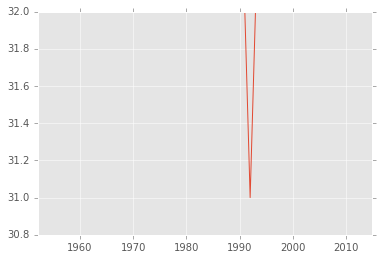

In [6]:
nl_all.year.value_counts().sort_index().plot()

plt.show()

In [7]:
nl_all[nl_all.league.isnull()]

,league,pos,round,stage,team,tier,year
1892,NaN,NaN,FIRST ROUND PROPER,8.0,MAIDSTONE UNITED,NaN,1993.0


In [8]:
nl_all = nl_all[~((nl_all.team == 'MAIDSTONE UNITED') & (nl_all.year == 1993))]

nl_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2046
Data columns (total 7 columns):
league    2046 non-null object
pos       2046 non-null float64
round     2046 non-null object
stage     2046 non-null float64
team      2046 non-null object
tier      128 non-null float64
year      2046 non-null float64
dtypes: float64(4), object(3)
memory usage: 127.9+ KB


We already know there are only 31 teams non-league teams entering in 1991 so this looks ok

In [9]:
nl_all.league.value_counts()

FOOTBALL CONFERENCE                                   279
SOUTHERN LEAGUE - PREMIER DIVISION                    160
ISTHMIAN LEAGUE PREMIER DIVISION                      143
NORTHERN PREMIER LEAGUE PREMIER DIVISION               91
CONFERENCE (ALLIANCE PREMIER LEAGUE)                   87
NORTHERN PREMIER LEAGUE                                87
SOUTHERN FOOTBALL LEAGUE PREMIER DIVISION              78
ISTHMIAN LEAGUE - SENIOR SECTION                       64
NATIONAL                                               64
MIDLAND COUNTIES LEAGUE                                59
CHESHIRE COUNTY LEAGUE                                 54
NORTHERN LEAGUE                                        50
SOUTHERN LEAGUE                                        48
SOUTHERN LEAGUE PREMIER DIVISION                       38
FOOTBALL CONFERENCE SOUTH                              36
FOOTBALL CONFERENCE NORTH                              34
SOUTHERN LEAGUE - FIRST DIVISION                       34
ATHENIAN LEAGU

We will now assign a tier to each league.

2012-2015 has already had a tier/division value assigned and we will extract the tier from this.

In [10]:
nl_all.tier.value_counts()

501.0    64
602.0    22
601.0    15
702.0    10
703.0     6
701.0     4
804.0     2
803.0     2
805.0     1
802.0     1
801.0     1
Name: tier, dtype: int64

In [11]:
nl_all['tier'] = np.floor(nl_all['tier'] / 100)

nl_all.tier.value_counts()

5.0    64
6.0    37
7.0    20
8.0     7
Name: tier, dtype: int64

regularising league names before adding tiers

In [12]:
#stripping whitespace
nl_all['league'] = nl_all['league'].str.strip()
#removing hyphens
nl_all['league'] = nl_all['league'].str.replace(' -', '')

In [13]:
nl_all.league.value_counts()

FOOTBALL CONFERENCE                                   289
SOUTHERN LEAGUE PREMIER DIVISION                      198
ISTHMIAN LEAGUE PREMIER DIVISION                      143
NORTHERN PREMIER LEAGUE PREMIER DIVISION               91
NORTHERN PREMIER LEAGUE                                87
CONFERENCE (ALLIANCE PREMIER LEAGUE)                   87
SOUTHERN FOOTBALL LEAGUE PREMIER DIVISION              78
ISTHMIAN LEAGUE SENIOR SECTION                         64
NATIONAL                                               64
MIDLAND COUNTIES LEAGUE                                59
CHESHIRE COUNTY LEAGUE                                 54
NORTHERN LEAGUE                                        50
SOUTHERN LEAGUE                                        48
FOOTBALL CONFERENCE SOUTH                              36
SOUTHERN LEAGUE FIRST DIVISION                         35
FOOTBALL CONFERENCE NORTH                              34
ATHENIAN LEAGUE                                        23
LANCASHIRE COM

Filling the most common leagues and then will then complete the rest year-by-year

In [14]:
# football conference has always been tier 5

nl_all.ix[nl_all.league == 'FOOTBALL CONFERENCE', 'tier'] = 5

In [15]:
nl_all.ix[nl_all.league == 'SOUTHERN LEAGUE PREMIER DIVISION'].year.value_counts().sort_index()

1960.0    10
1961.0    10
1962.0     8
1963.0     8
1964.0    10
1965.0     9
1966.0    10
1967.0     9
1968.0    10
1969.0     9
1970.0    11
1971.0     8
1972.0     9
1973.0     8
1974.0     7
1975.0     8
1976.0     7
1977.0     7
1978.0     7
1979.0     9
1983.0     1
1984.0     3
1985.0     2
1986.0     3
1987.0     5
1988.0     5
1989.0     5
Name: year, dtype: int64

In [16]:
nl_all.ix[((nl_all.league == 'SOUTHERN LEAGUE PREMIER DIVISION') & nl_all.year.isin(range(1960, 1980))), 'tier'] = 5
nl_all.ix[((nl_all.league == 'SOUTHERN LEAGUE PREMIER DIVISION') & nl_all.year.isin(range(1980, 1990))), 'tier'] = 6

In [17]:
nl_all.ix[nl_all.league == 'ISTHMIAN LEAGUE PREMIER DIVISION'].year.value_counts().sort_index()

1978.0    8
1981.0    5
1982.0    7
1983.0    5
1986.0    6
1987.0    4
1988.0    5
1989.0    5
1990.0    4
1991.0    3
1992.0    7
1993.0    6
1994.0    6
1995.0    9
1996.0    5
1997.0    6
1998.0    6
1999.0    6
2000.0    4
2001.0    5
2002.0    4
2003.0    3
2004.0    6
2005.0    3
2006.0    2
2007.0    2
2008.0    3
2009.0    3
2010.0    3
2011.0    2
Name: year, dtype: int64

In [18]:
#this league was tier 6 until 2004, and then tier 7 after
nl_all.ix[((nl_all.league == 'ISTHMIAN LEAGUE PREMIER DIVISION') & nl_all.year.isin(range(1978, 1980))), 'tier'] = 5
nl_all.ix[((nl_all.league == 'ISTHMIAN LEAGUE PREMIER DIVISION') & nl_all.year.isin(range(1980, 2005))), 'tier'] = 6
nl_all.ix[((nl_all.league == 'ISTHMIAN LEAGUE PREMIER DIVISION') & nl_all.year.isin(range(2005, 2012))), 'tier'] = 7

In [19]:
nl_all.ix[nl_all.league == 'NORTHERN PREMIER LEAGUE'].year.value_counts().sort_index()

1969.0     6
1970.0     4
1971.0     7
1972.0     8
1973.0     9
1974.0     6
1975.0     7
1976.0     9
1977.0    10
1978.0     7
1979.0     9
1980.0     4
1984.0     1
Name: year, dtype: int64

In [20]:
# this league was always tier 6

nl_all.ix[((nl_all.league == 'NORTHERN PREMIER LEAGUE') & nl_all.year.isin(range(1969, 1980))), 'tier'] = 5
nl_all.ix[((nl_all.league == 'NORTHERN PREMIER LEAGUE') & nl_all.year.isin(range(1980, 1985))), 'tier'] = 6

In [21]:
nl_all.ix[nl_all.league == 'NORTHERN PREMIER LEAGUE PREMIER DIVISION'].year.value_counts().sort_index()

1981.0    4
1982.0    2
1983.0    3
1984.0    4
1985.0    4
1987.0    3
1988.0    1
1989.0    3
1990.0    3
1991.0    5
1992.0    2
1993.0    3
1994.0    4
1995.0    5
1996.0    6
1997.0    3
1998.0    6
1999.0    4
2000.0    5
2001.0    3
2002.0    5
2003.0    4
2004.0    5
2006.0    1
2007.0    1
2009.0    1
2011.0    1
Name: year, dtype: int64

In [22]:
#this league was tier 6 until 2004, and then tier 7 after

nl_all.ix[((nl_all.league == 'NORTHERN PREMIER LEAGUE PREMIER DIVISION') & nl_all.year.isin(range(1978, 2005))), 'tier'] = 6
nl_all.ix[((nl_all.league == 'NORTHERN PREMIER LEAGUE PREMIER DIVISION') & nl_all.year.isin(range(2005, 2012))), 'tier'] = 7

In [23]:
nl_all.ix[nl_all.league == 'CONFERENCE (ALLIANCE PREMIER LEAGUE)'].year.value_counts().sort_index()

1981.0    10
1982.0    10
1983.0    14
1984.0    14
1987.0    12
1988.0    14
1989.0    13
Name: year, dtype: int64

In [24]:
#this league was always tier 5

nl_all.ix[nl_all.league == 'CONFERENCE (ALLIANCE PREMIER LEAGUE)', 'tier'] = 5

In [25]:
nl_all.ix[nl_all.league == 'SOUTHERN FOOTBALL LEAGUE PREMIER DIVISION'].year.value_counts().sort_index()

1989.0    1
1990.0    5
1991.0    4
1992.0    4
1993.0    3
1994.0    3
1995.0    3
1996.0    4
1997.0    3
1998.0    2
1999.0    5
2000.0    5
2001.0    4
2002.0    8
2003.0    6
2004.0    3
2005.0    4
2006.0    1
2007.0    3
2008.0    1
2009.0    2
2010.0    3
2011.0    1
Name: year, dtype: int64

In [26]:
#this league was tier 6 until 2004, and then tier 7 after

nl_all.ix[((nl_all.league == 'SOUTHERN FOOTBALL LEAGUE PREMIER DIVISION') & nl_all.year.isin(range(1989, 2005))), 'tier'] = 6
nl_all.ix[((nl_all.league == 'SOUTHERN FOOTBALL LEAGUE PREMIER DIVISION') & nl_all.year.isin(range(2005, 2012))), 'tier'] = 7

checking the updated dataframe

In [27]:
nl_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2046
Data columns (total 7 columns):
league    2046 non-null object
pos       2046 non-null float64
round     2046 non-null object
stage     2046 non-null float64
team      2046 non-null object
tier      1101 non-null float64
year      2046 non-null float64
dtypes: float64(4), object(3)
memory usage: 127.9+ KB


filtering to rows without a tier yet

In [28]:
no_tier = nl_all[nl_all.tier.isnull()]

In [29]:
# returning a datframe that has one row per year/league which we will save out

year_league = no_tier.groupby(['year', 'league']).first()

year_league.head()

pos               round  stage  \
year   league                                                            
1952.0 ATHENIAN LEAGUE                  3.0  FIRST ROUND PROPER    8.0   
       BIRMINGHAM AND DISTRICT LEAGUE  12.0  FIRST ROUND PROPER    8.0   
       CENTRAL ALLIANCE                 1.0  FIRST ROUND PROPER    8.0   
       CHESHIRE COUNTY LEAGUE           2.0  FIRST ROUND PROPER    8.0   
       DELPHIAN LEAGUE                  6.0  FIRST ROUND PROPER    8.0   

                                                   team  tier  
year   league                                                  
1952.0 ATHENIAN LEAGUE                          BROMLEY   NaN  
       BIRMINGHAM AND DISTRICT LEAGUE      BRUSH SPORTS   NaN  
       CENTRAL ALLIANCE                   ILKESTON TOWN   NaN  
       CHESHIRE COUNTY LEAGUE                      RHYL   NaN  
       DELPHIAN LEAGUE                 AYLESBURY UNITED   NaN

In [30]:
year_league.to_csv(r'C:\Dropbox\Python\scrapy\facup\02_merge\year_league.csv')

In [31]:
year_league_updated = pd.read_csv(r'C:\Dropbox\Python\scrapy\facup\02_merge\year_league_v2.csv', index_col=['year', 'league'])

year_league_updated.head()

tier
year league                              
1952 ATHENIAN LEAGUE                    7
     BIRMINGHAM AND DISTRICT LEAGUE     7
     CENTRAL ALLIANCE                   7
     CHESHIRE COUNTY LEAGUE             7
     DELPHIAN LEAGUE                    7

Updating main dataframe with tiers

In [32]:
nl_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2046
Data columns (total 7 columns):
league    2046 non-null object
pos       2046 non-null float64
round     2046 non-null object
stage     2046 non-null float64
team      2046 non-null object
tier      1101 non-null float64
year      2046 non-null float64
dtypes: float64(4), object(3)
memory usage: 127.9+ KB


In [33]:
nl_all.set_index(['year','league'], inplace=True)

nl_all.head()

pos               round  stage           team  \
year   league                                                                   
1952.0 ATHENIAN LEAGUE          3.0  FIRST ROUND PROPER    8.0        BROMLEY   
       ATHENIAN LEAGUE         11.0  FIRST ROUND PROPER    8.0         LEYTON   
       CENTRAL ALLIANCE         1.0  FIRST ROUND PROPER    8.0  ILKESTON TOWN   
       CHESHIRE COUNTY LEAGUE   2.0  FIRST ROUND PROPER    8.0           RHYL   
       CHESHIRE COUNTY LEAGUE   4.0  FIRST ROUND PROPER    8.0  WITTON ALBION   

                               tier  
year   league                        
1952.0 ATHENIAN LEAGUE          NaN  
       ATHENIAN LEAGUE          NaN  
       CENTRAL ALLIANCE         NaN  
       CHESHIRE COUNTY LEAGUE   NaN  
       CHESHIRE COUNTY LEAGUE   NaN

In [34]:
nl_all.update(year_league_updated)

In [35]:
nl_all.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2046 entries, (1952.0, ATHENIAN LEAGUE) to (2015.0, ISTHMIAN PREMIER)
Data columns (total 5 columns):
pos      2046 non-null float64
round    2046 non-null object
stage    2046 non-null float64
team     2046 non-null object
tier     2046 non-null float64
dtypes: float64(3), object(2)
memory usage: 95.9+ KB


In [36]:
nl_all.reset_index(inplace=True)

nl_all.head()

,year,league,pos,round,stage,team,tier
0,1952.0,ATHENIAN LEAGUE,3.0,FIRST ROUND PROPER,8.0,BROMLEY,7.0
1,1952.0,ATHENIAN LEAGUE,11.0,FIRST ROUND PROPER,8.0,LEYTON,7.0
2,1952.0,CENTRAL ALLIANCE,1.0,FIRST ROUND PROPER,8.0,ILKESTON TOWN,7.0
3,1952.0,CHESHIRE COUNTY LEAGUE,2.0,FIRST ROUND PROPER,8.0,RHYL,7.0
4,1952.0,CHESHIRE COUNTY LEAGUE,4.0,FIRST ROUND PROPER,8.0,WITTON ALBION,7.0


In [37]:
group = nl_all.groupby(['year','tier']).size().unstack()
#reversing columns order
group = group[group.columns[::-1]]

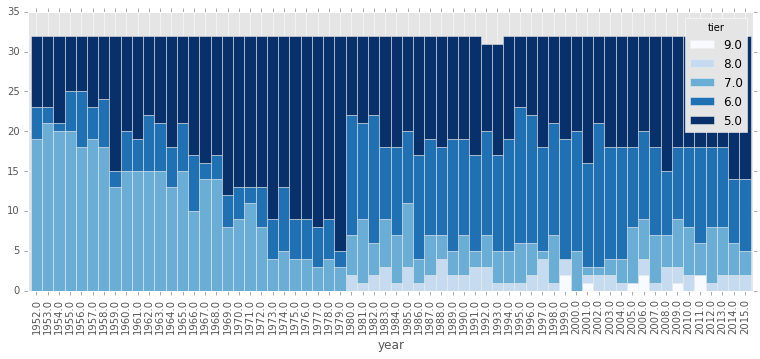

In [38]:
group.plot(kind='bar', 
           figsize=(13,5), 
           width=1, 
           stacked=True, 
           colormap = 'Blues',
           legend=True)

plt.show()

1992 has 31 teams due to start of Premier League, 1993 has 31 teams due to MAIDSTONE UNITED dropping out

Prior to 1959 there were only 3 tiers in the football league (division 3 was run in parallel) so non-league started in tier 4, need to update tier to account for this

In [39]:
nl_all['tier'] = np.where(nl_all.year < 1959, nl_all.tier - 1, nl_all.tier)

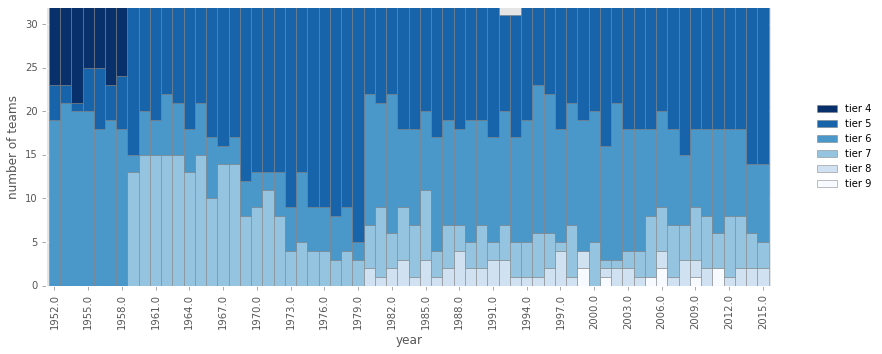

In [64]:
nl_all = pd.read_csv(r'C:\Dropbox\Python\scrapy\facup\02_merge\fa_nl_merge_all.csv')

group2 = nl_all.groupby(['year','tier']).size().unstack()
#reversing columns order
group2 = group2[group2.columns[::-1]]

group2.plot(kind='bar', 
           figsize=(13,5), 
           width=1, 
           stacked=True, 
           colormap = 'Blues',
           edgecolor='gray',
           legend=True,
           ylim=(0,32),)

ax = plt.gca()

ax.set_ylabel('number of teams')
ax.yaxis.tick_left()

ax.xaxis.tick_bottom()
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::3])
ax.xaxis.set_ticklabels(ticklabels[::3])

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[::-1],['tier 4','tier 5','tier 6','tier 7','tier 8','tier 9'], loc='center left', bbox_to_anchor=(1.05, 0.5), 
          fontsize=10, framealpha=0).set_visible(True) 

plt.show()

Creating rank column

assuming 22 teams per league (roughly correct but data not avaialble for more accurate measurement)

In [182]:
def ranker(row):
    if row['year'] < 1959:
        row['rank'] = 68 + ((row['tier'] - 4) * 22) + row['pos']
    else:
        row['rank'] = 92 + ((row['tier'] - 5) * 22) + row['pos']
    return row

nl_all = nl_all.apply(ranker, axis=1)

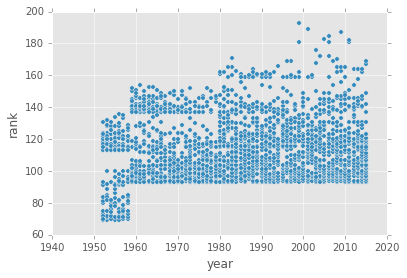

In [183]:
nl_all.plot.scatter(x='year', y='rank', )

plt.show()

In [184]:
nl_all.to_csv(r'C:\Dropbox\Python\scrapy\facup\02_merge\fa_nl_merge_all.csv', index = False)